# Generatvie Adverserial Network

**Generative Adversarial Network is deep learning model that learns to generate new data (like images, audio, or text) that looks realistic. In this project I'm using a gan data of paintings and create a model that generates new painting similar to the data it was trained on.**

### **Data Description**<br>
The dataset contains four directories: `monet_tfrec`, `photo_tfrec`, `monet_jpg`, and `photo_jpg`. The `monet_tfrec` and `monet_jpg` directories contain the same painting images, and the `photo_tfrec` and `photo_jpg` directories contain the same photos.

### **Task 1: Load the dataset.**

Upload kaggle.json file into `google.colab`.

In [34]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"shubhamvigoniya","key":"8f7bf3429b69a4431b9634cc3dfeafa1"}'}

In [35]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Download the dataset from kaggle [GANs](https://www.kaggle.com/competitions/gan-getting-started/data).

In [36]:
# Download the dataset
!kaggle competitions download -c gan-getting-started


gan-getting-started.zip: Skipping, found more recently modified local copy (use --force to force download)


This command is going to unzip the data in store in zip file and named `gan_data`

In [37]:
!unzip gan-getting-started.zip -d gan_data


Streaming output truncated to the last 5000 lines.
  inflating: gan_data/photo_jpg/46e84039a1.jpg  
  inflating: gan_data/photo_jpg/46f391abec.jpg  
  inflating: gan_data/photo_jpg/46f5ef1042.jpg  
  inflating: gan_data/photo_jpg/4706619607.jpg  
  inflating: gan_data/photo_jpg/4707b03a08.jpg  
  inflating: gan_data/photo_jpg/47100a9939.jpg  
  inflating: gan_data/photo_jpg/471f4755b9.jpg  
  inflating: gan_data/photo_jpg/472b351bc4.jpg  
  inflating: gan_data/photo_jpg/472d5ac100.jpg  
  inflating: gan_data/photo_jpg/4758e5dd4c.jpg  
  inflating: gan_data/photo_jpg/4762bb79ef.jpg  
  inflating: gan_data/photo_jpg/4778b13518.jpg  
  inflating: gan_data/photo_jpg/4787b82d37.jpg  
  inflating: gan_data/photo_jpg/478e07feaa.jpg  
  inflating: gan_data/photo_jpg/478eb12a82.jpg  
  inflating: gan_data/photo_jpg/479698b371.jpg  
  inflating: gan_data/photo_jpg/4796d67f61.jpg  
  inflating: gan_data/photo_jpg/47aad493bd.jpg  
  inflating: gan_data/photo_jpg/47ae0edd23.jpg  
  inflating: gan_d

### **Task 2: Data Exploratory Analysis**




In [38]:
import os

data_dir = "gan_data"
print(os.listdir(data_dir))
print(f"Total number of dictionary in gan_data folder: {len(os.listdir(data_dir))}")

['photo_tfrec', 'monet_jpg', 'monet_tfrec', 'photo_jpg']
Total number of dictionary in gan_data folder: 4


In [40]:
import os

data_dir = "gan_data"
for folder_name in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder_name)
    if os.path.isdir(folder_path):
        total_files = len(os.listdir(folder_path))
        jpg_files = len(glob.glob(os.path.join(folder_path, "*.jpg")))
        other_files = total_files - jpg_files
        print(f"Folder: {folder_name}")
        print(f"Total files: {total_files}")
        print(f".jpg files: {jpg_files}")
        print(f".tfrec: {other_files}\n")

Folder: photo_tfrec
Total files: 20
.jpg files: 0
.tfrec: 20

Folder: monet_jpg
Total files: 300
.jpg files: 300
.tfrec: 0

Folder: monet_tfrec
Total files: 5
.jpg files: 0
.tfrec: 5

Folder: photo_jpg
Total files: 7038
.jpg files: 7038
.tfrec: 0



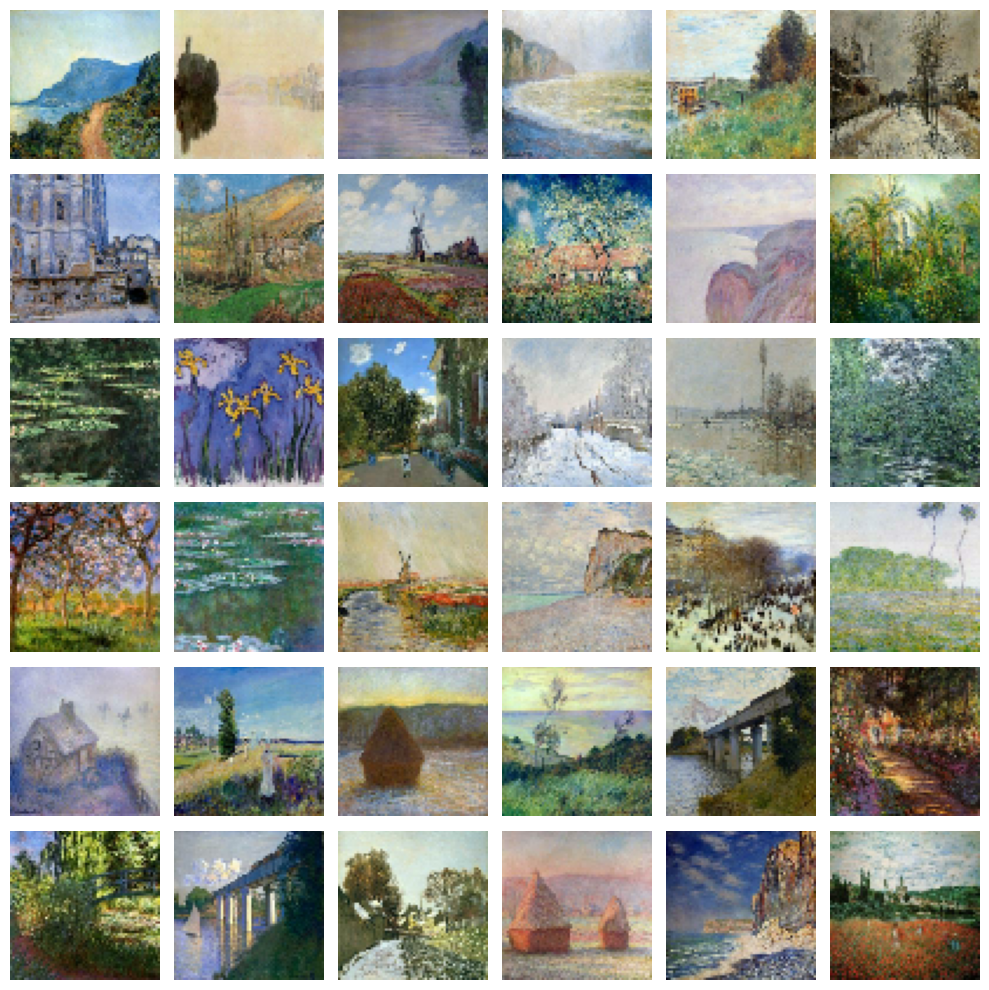

In [41]:
import matplotlib.pyplot as plt
import os
import glob

# Reuse the data_path and load_image function from previous cells
data_path = "/content/gan_data/monet_jpg"

def load_image(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [IMG_SIZE, IMG_SIZE])
    img = (img - 127.5) / 127.5
    return img

# Get a list of all image file paths in the monet_jpg directory
image_files = glob.glob(os.path.join(data_path, "*.jpg"))

# Select a subset of images to display (e.g., the first 36 for a 6x6 grid)
num_images_to_display = 36
selected_image_files = image_files[:num_images_to_display]

# Load and display the images in a 6x6 grid
plt.figure(figsize=(10, 10))
for i, image_file in enumerate(selected_image_files):
    img = load_image(image_file)
    plt.subplot(6, 6, i + 1)
    plt.imshow((img + 1) / 2)  # Denormalize the image for display
    plt.axis('off')

plt.tight_layout()
plt.show()

## Task 3: Define the generator model

Subtask 1: Create the generator model using Keras Sequential API.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


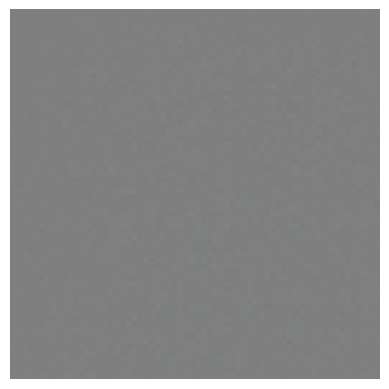

In [65]:
import tensorflow as tf
from keras import Sequential
from keras import layers

def make_generator():
    model = tf.keras.Sequential([
        layers.Dense(8*8*256, use_bias=False, input_shape=(100,)),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Reshape((8,8,256)),

        layers.Conv2DTranspose(128, (5,5), strides=(2,2), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Conv2DTranspose(64, (5,5), strides=(2,2), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Conv2DTranspose(3, (5,5), strides=(2,2), padding='same', use_bias=False, activation='tanh')
    ])
    return model

generator = make_generator()
noise = tf.random.normal([1, 100])
plt.imshow((generator(noise, training=False)[0] + 1) / 2)
plt.axis('off')
plt.show()

Subtask 2: Create the discriminator model using Keras Sequential API.


In [43]:
def make_discriminator():
    model = tf.keras.Sequential([
        layers.Conv2D(64, (5,5), strides=(2,2), padding='same', input_shape=[IMG_SIZE,IMG_SIZE,3]),
        layers.LeakyReLU(),
        layers.Dropout(0.3),

        layers.Conv2D(128, (5,5), strides=(2,2), padding='same'),
        layers.LeakyReLU(),
        layers.Dropout(0.3),

        layers.Flatten(),
        layers.Dense(1)
    ])
    return model

discriminator = make_discriminator()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Subtask 3: Set up the loss functions and optimizers for both the generator and discriminator.


In [44]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    return real_loss + fake_loss

Subtask 4: Implement the training step function that performs one step of training for both the generator and discriminator.


In [45]:
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    # Calculate discriminator accuracy for monitoring
    d_acc = discriminator_accuracy(real_output, fake_output)

    return gen_loss, disc_loss, d_acc

Subtask 5: Implement the training loop to train the GAN over multiple epochs.


In [68]:
# Correct the typo in discriminator_accuracy and redefine optimizers and train_step
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

def discriminator_accuracy(real_output, fake_output):
    real_preds = tf.sigmoid(real_output)
    fake_preds = tf.sigmoid(fake_output) # Corrected typo here

    real_acc = tf.reduce_mean(tf.cast(real_preds > 0.5, tf.float32))
    fake_acc = tf.reduce_mean(tf.cast(fake_preds < 0.5, tf.float32))

    return (real_acc + fake_acc) / 2.0

@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    # Calculate discriminator accuracy for monitoring
    d_acc = discriminator_accuracy(real_output, fake_output)

    return gen_loss, disc_loss, d_acc

# Explicitly build the models by calling them with dummy data
dummy_noise = tf.random.normal([1, noise_dim])
_ = generator(dummy_noise)

dummy_image = tf.random.normal([1, IMG_SIZE, IMG_SIZE, 3])
_ = discriminator(dummy_image)


# Define the total number of epochs for training
EPOCHS = 50

# Define the dimension of the noise vector
noise_dim = 100

# Iterate through the specified number of epochs
for epoch in range(EPOCHS):
    g_loss_total, d_loss_total, d_acc_total = 0, 0, 0
    steps = 0

    # Iterate through the dataset
    for image_batch in dataset:
        # Call the train_step function
        gen_loss, disc_loss, d_acc = train_step(image_batch)
        g_loss_total += gen_loss
        d_loss_total += disc_loss
        d_acc_total += d_acc
        steps += 1

    # Print the epoch number and metrics
    print(f"Epoch {epoch+1}/{EPOCHS} | "
          f"Gen Loss: {g_loss_total/steps:.4f} | "
          f"Disc Loss: {d_loss_total/steps:.4f} | "
          f"Disc Acc: {d_acc_total/steps:.4f}")

Epoch 1/50 | Gen Loss: 1.2120 | Disc Loss: 0.6855 | Disc Acc: 0.9385
Epoch 2/50 | Gen Loss: 1.7627 | Disc Loss: 0.4804 | Disc Acc: 0.9464
Epoch 3/50 | Gen Loss: 1.7698 | Disc Loss: 0.4145 | Disc Acc: 0.9680
Epoch 4/50 | Gen Loss: 1.4069 | Disc Loss: 0.4590 | Disc Acc: 0.9767
Epoch 5/50 | Gen Loss: 1.4145 | Disc Loss: 0.4551 | Disc Acc: 0.9760
Epoch 6/50 | Gen Loss: 1.4125 | Disc Loss: 0.4826 | Disc Acc: 0.9675
Epoch 7/50 | Gen Loss: 1.2944 | Disc Loss: 0.5591 | Disc Acc: 0.9565
Epoch 8/50 | Gen Loss: 1.3994 | Disc Loss: 0.5735 | Disc Acc: 0.9371
Epoch 9/50 | Gen Loss: 1.7448 | Disc Loss: 0.4915 | Disc Acc: 0.9339
Epoch 10/50 | Gen Loss: 2.2660 | Disc Loss: 0.3533 | Disc Acc: 0.9466
Epoch 11/50 | Gen Loss: 2.1678 | Disc Loss: 0.2763 | Disc Acc: 0.9696
Epoch 12/50 | Gen Loss: 1.9213 | Disc Loss: 0.2644 | Disc Acc: 0.9922
Epoch 13/50 | Gen Loss: 2.3471 | Disc Loss: 0.2054 | Disc Acc: 0.9891
Epoch 14/50 | Gen Loss: 2.8097 | Disc Loss: 0.1790 | Disc Acc: 0.9854
Epoch 15/50 | Gen Loss: 2.556

## Task 5: Generate and visualize images
After training, generate new images using the trained generator and visualize them.


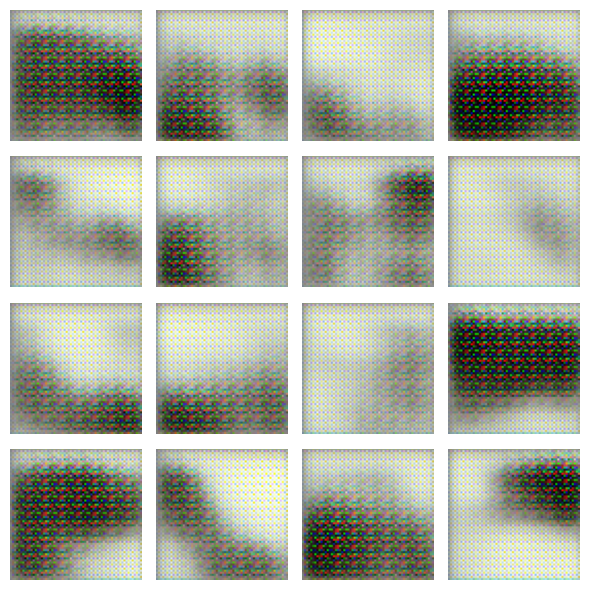

In [56]:
# Generate a batch of random noise vectors
noise = tf.random.normal([16, noise_dim])

# Use the trained generator to generate images
generated_images = generator(noise, training=False)

# Create a matplotlib figure and a 4x4 grid of subplots
plt.figure(figsize=(6, 6))

# Iterate through the generated images and display them
for i in range(16):
    plt.subplot(4, 4, i + 1)
    # Denormalize the image for display
    plt.imshow((generated_images[i] + 1) / 2)
    # Turn off the axis for each subplot
    plt.axis('off')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

## Discussion and Conclusion:

*   The generator model and discriminator model was successfully created using the Keras Sequential API, including Dense, BatchNormalization, LeakyReLU, Reshape, and Conv2DTranspose layers.
*   Loss functions (BinaryCrossentropy for both generator and discriminator) and Adam optimizers were successfully defined for training.
*   The GAN was successfully trained for 50 epochs, with epoch-wise generator loss, discriminator loss, and discriminator accuracy being printed.
*   After training, new images were successfully generated using the trained generator and visualized in a 4x4 grid using matplotlib.

### Insights or Next Steps

*   The training metrics (losses and accuracy) should be monitored to assess the convergence and stability of the GAN training.
*   Experiment with different hyperparameters (learning rates, batch size, number of epochs) and potentially different network architectures to improve the quality of generated images.
